In [2]:
data<-read.csv(choose.files())
data

MedExpense,PublicIns,PrivateIns,Age,Female,Income,Illnesses,SSIratio,EducYr,Hisp,Black,Married,Urban,Priority
1,1,0,69,0,7.62500,1,0.9836066,12,0,0,1,1,1
2,0,1,73,1,3.75000,0,1.0000000,11,0,0,1,1,0
2,0,0,71,1,23.76200,3,0.3257301,12,0,0,1,1,1
2,0,0,90,0,9.42100,0,1.0000000,6,0,1,0,1,0
2,0,1,66,1,44.40000,1,0.2927928,13,0,0,0,1,1
2,1,0,75,1,52.15900,1,0.3461915,17,0,0,0,1,1
3,1,0,71,0,24.77320,0,0.2918476,12,0,0,1,1,0
3,1,0,70,0,49.83171,1,0.2408105,14,0,0,1,1,1
3,0,1,71,1,18.14200,2,0.0000000,12,0,0,1,1,1
3,1,0,69,0,40.10700,1,0.1795198,17,0,0,0,1,1


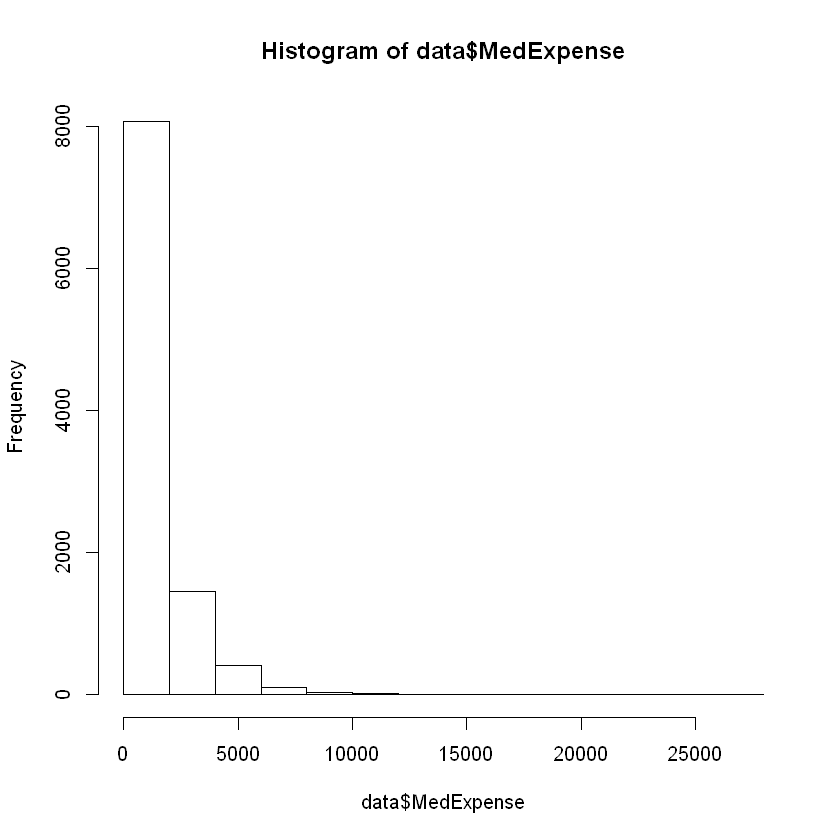

In [3]:
hist(data$MedExpense)

# Answers: No, it's not suitable for the linear regression, we have to apply tranformations. Log transformation is generally considered when keeping the any "amount " type.

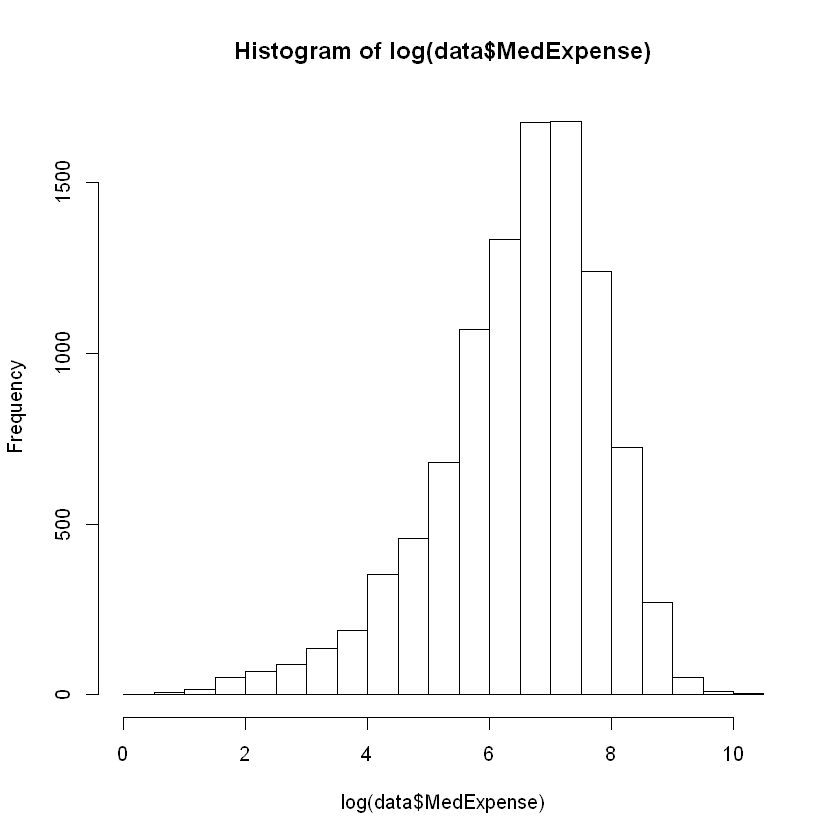

In [4]:
hist(log(data$MedExpense))

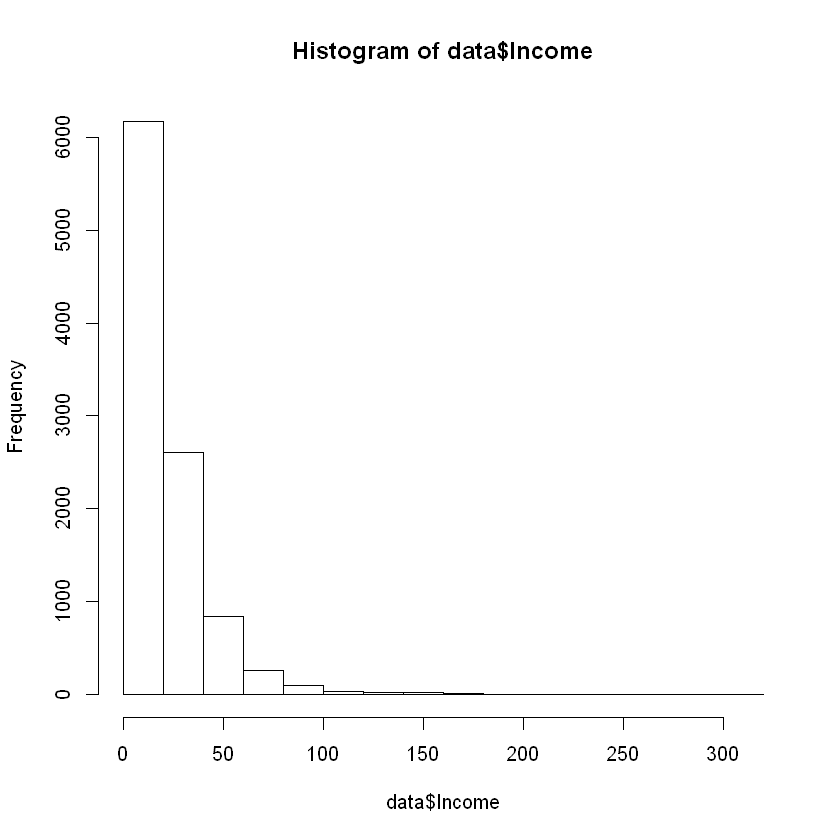

In [5]:
hist(data$Income)

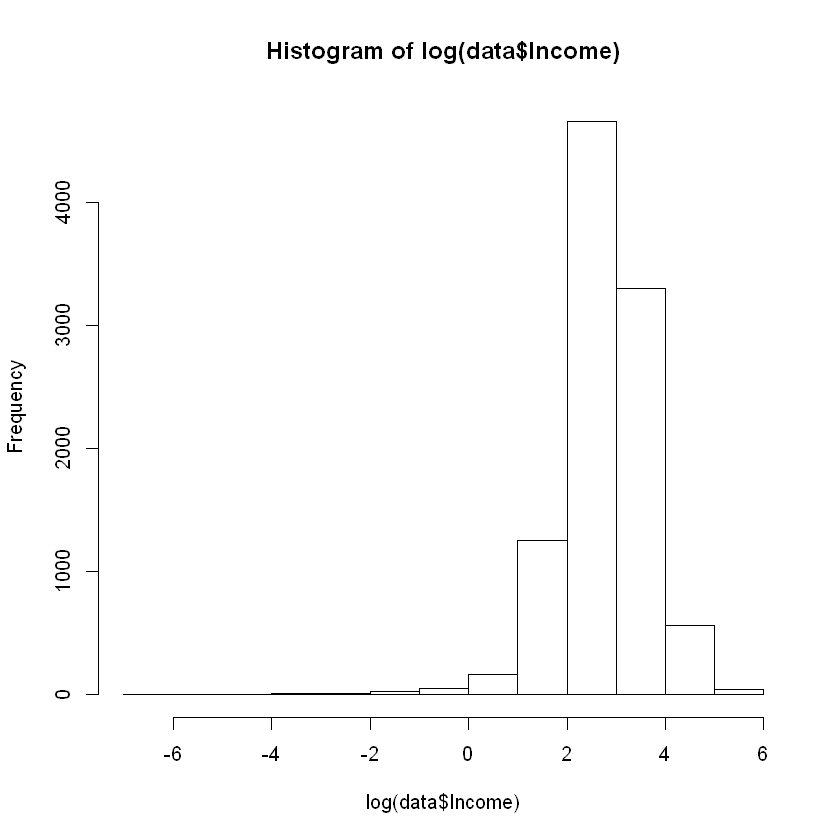

In [6]:
hist(log(data$Income))

# In my opinion, number of illness, private and public insurance, Age, gender, SSI and income affect the medical expenses.

In [8]:
m1<-lm(log(MedExpense)~PrivateIns+PublicIns+Illnesses+Age+Female+log(Income)*SSIratio, data=data)
summary(m1)


Call:
lm(formula = log(MedExpense) ~ PrivateIns + PublicIns + Illnesses + 
    Age + Female + log(Income) * SSIratio, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.2735 -0.6674  0.1553  0.8432  3.6424 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)           5.721838   0.155366  36.828  < 2e-16 ***
PrivateIns           -0.004911   0.032112  -0.153 0.878459    
PublicIns             0.096509   0.032583   2.962 0.003064 ** 
Illnesses             0.435771   0.009585  45.466  < 2e-16 ***
Age                  -0.003997   0.001891  -2.113 0.034597 *  
Female                0.051931   0.025175   2.063 0.039156 *  
log(Income)           0.018314   0.016834   1.088 0.276674    
SSIratio             -0.088597   0.081415  -1.088 0.276523    
log(Income):SSIratio  0.135871   0.035776   3.798 0.000147 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.235 on 10080 degrees of freedom
Mu

# As the Multiple R Squared is very Less, we can say that the model isnt good.

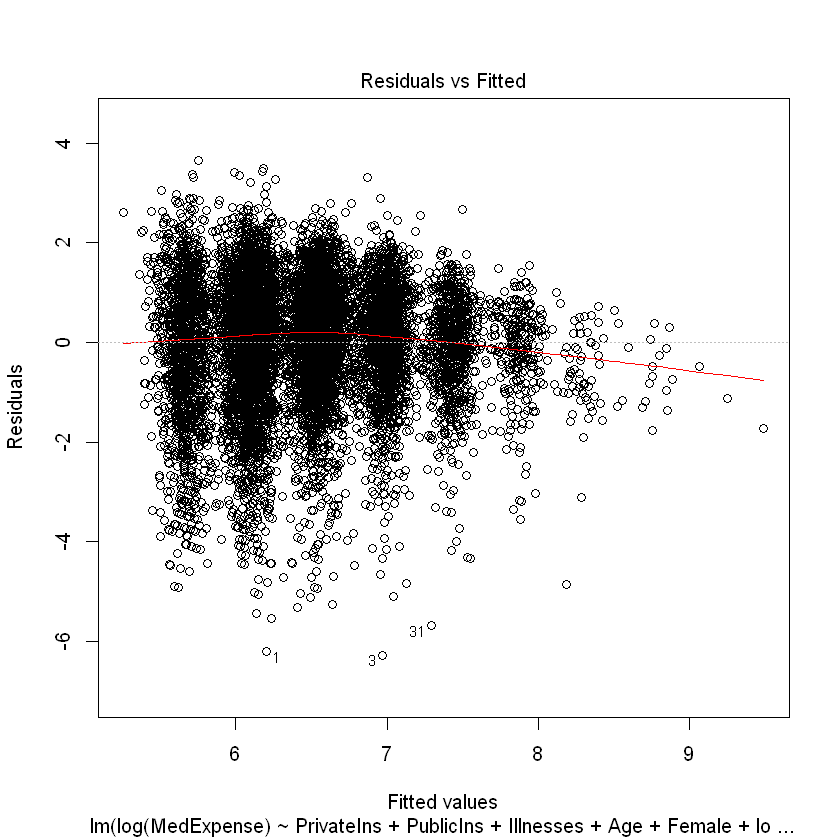

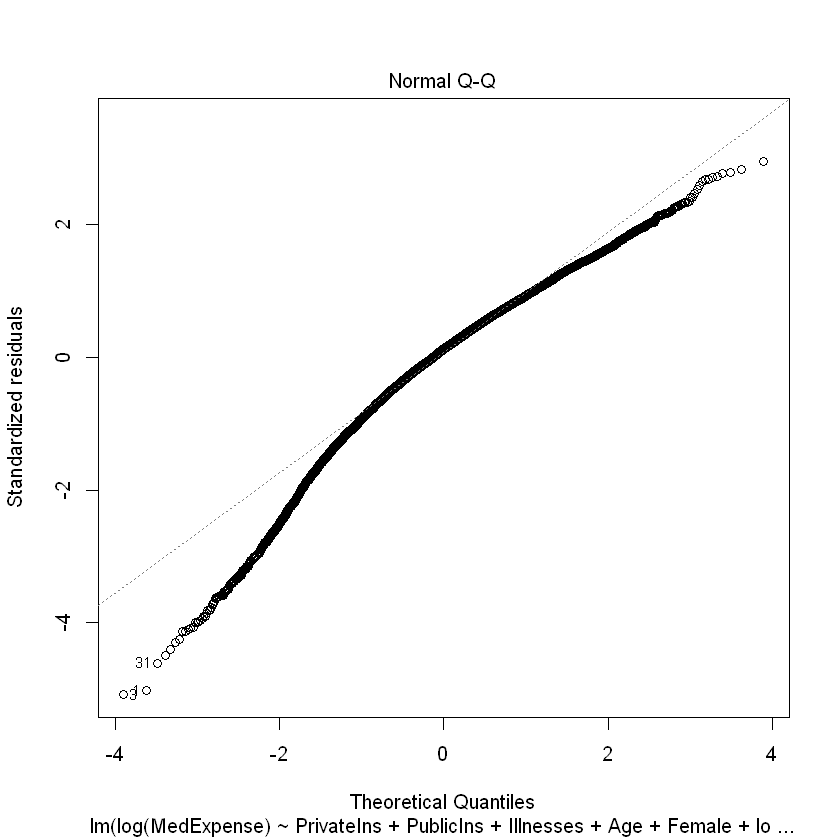

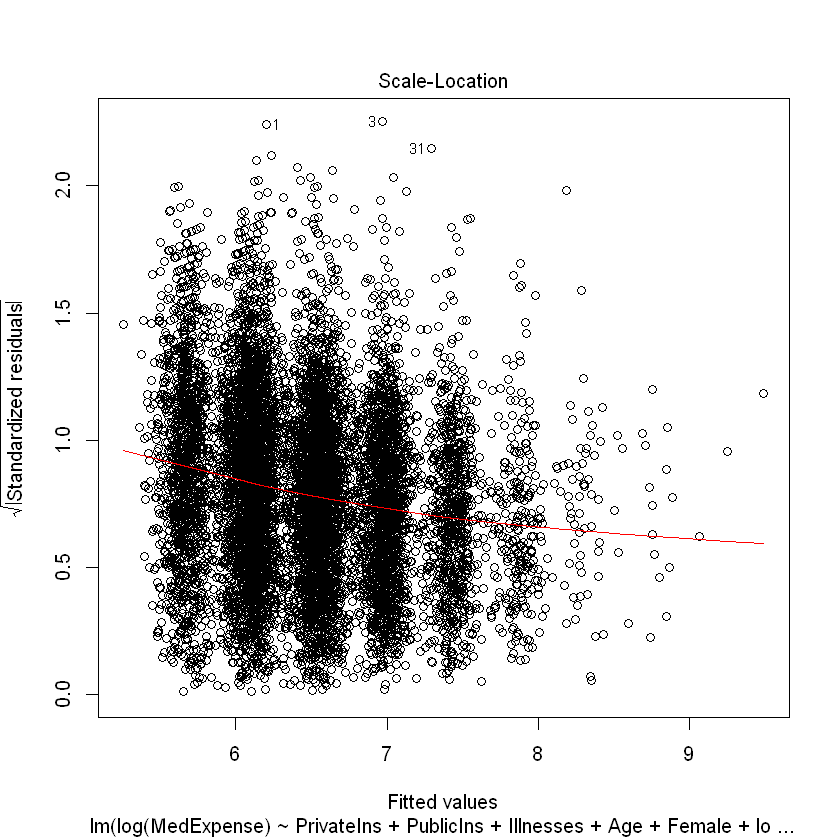

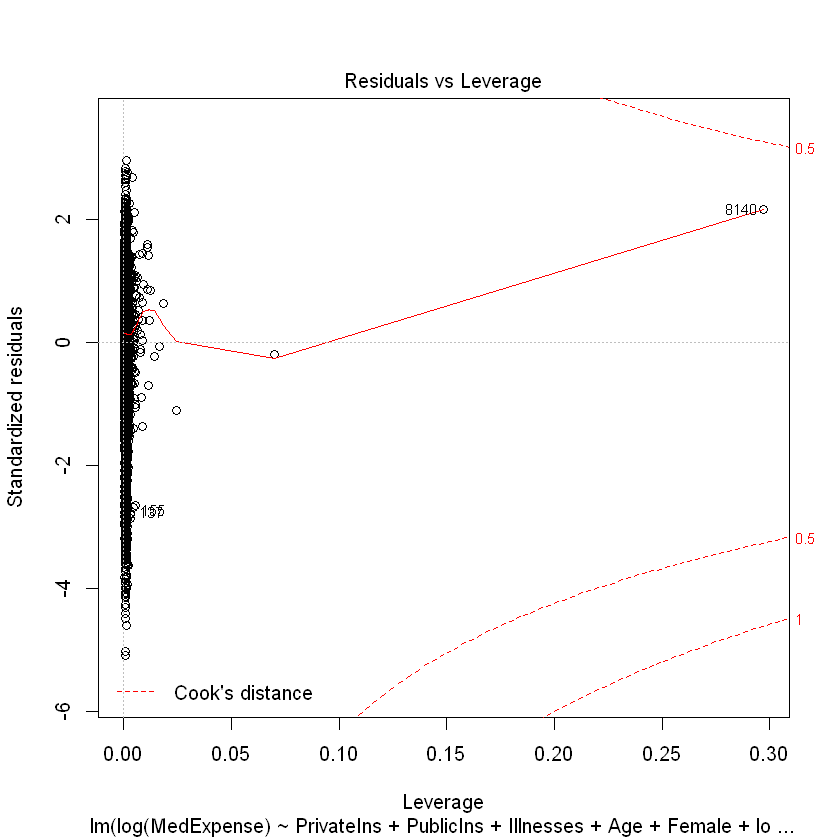

In [9]:
plot(m1)

In [10]:
bartlett.test(list(m1$res,m1$fit))


	Bartlett test of homogeneity of variances

data:  list(m1$res, m1$fit)
Bartlett's K-squared = 5382, df = 1, p-value < 2.2e-16


In [11]:
library(car)
vif(m1)

ERROR: Error in library(car): there is no package called 'car'
